In [25]:
# code to generate MSMC demography plots
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import sys

In [26]:
sns.set_style('whitegrid')

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10

In [27]:
# load summaries of ARG
coalescent_path = "/Users/will_milligan/PycharmProjects/MUTATOR_FINAL/coalescent_summaries.pickle"
with open(coalescent_path,'rb') as fin:
    (eur_coal,afr_coal,anc_coal) = pickle.load(fin)

# total number of mutational oppurtunities per mutation type
total_opp = sum(anc_coal+eur_coal)/32

# scale coalescent by 1/32 - the proportion of mutational oppurtunities per mutation type
relevant_coal = (anc_coal+eur_coal)/32
# the expected number of mutations per mutation type relative to the baseline mutation rate
european_nonfocal_value = sum(relevant_coal)

In [28]:
def calculate_enrichment(relevant_coal = relevant_coal,peak_start = 1000,peak_value = 1.5,peak_length = 1000,mutation_rate = mutation_rate,african_r=1/96,eur_nonfocal_value = european_nonfocal_value):
    
    # excess number of mutations at the focal mutation type relative to the baseline mutation rate
    focal_mutation_oppurtunities = sum(relevant_coal[peak_start-peak_length:peak_start])
    focal_value = focal_mutation_oppurtunities*(peak_value-1)
    # r value for the focal mutation type in europeans
    european_r = (eur_nonfocal_value+focal_value)/(96*eur_nonfocal_value+focal_value)

    # return enrichment statistic and proportion of mutational oppurtunities that occur during the peak
    return european_r/african_r,focal_mutation_oppurtunities/total_opp

x = np.linspace(1000,10000,1001)
y1 = []
y2 = []

for peak_start in x:
    
    ymean,proportion = calculate_enrichment(peak_start=int(peak_start))
    y1.append(ymean)
    y2.append(proportion)
    
    

1.0 3.1 3.099275000000001


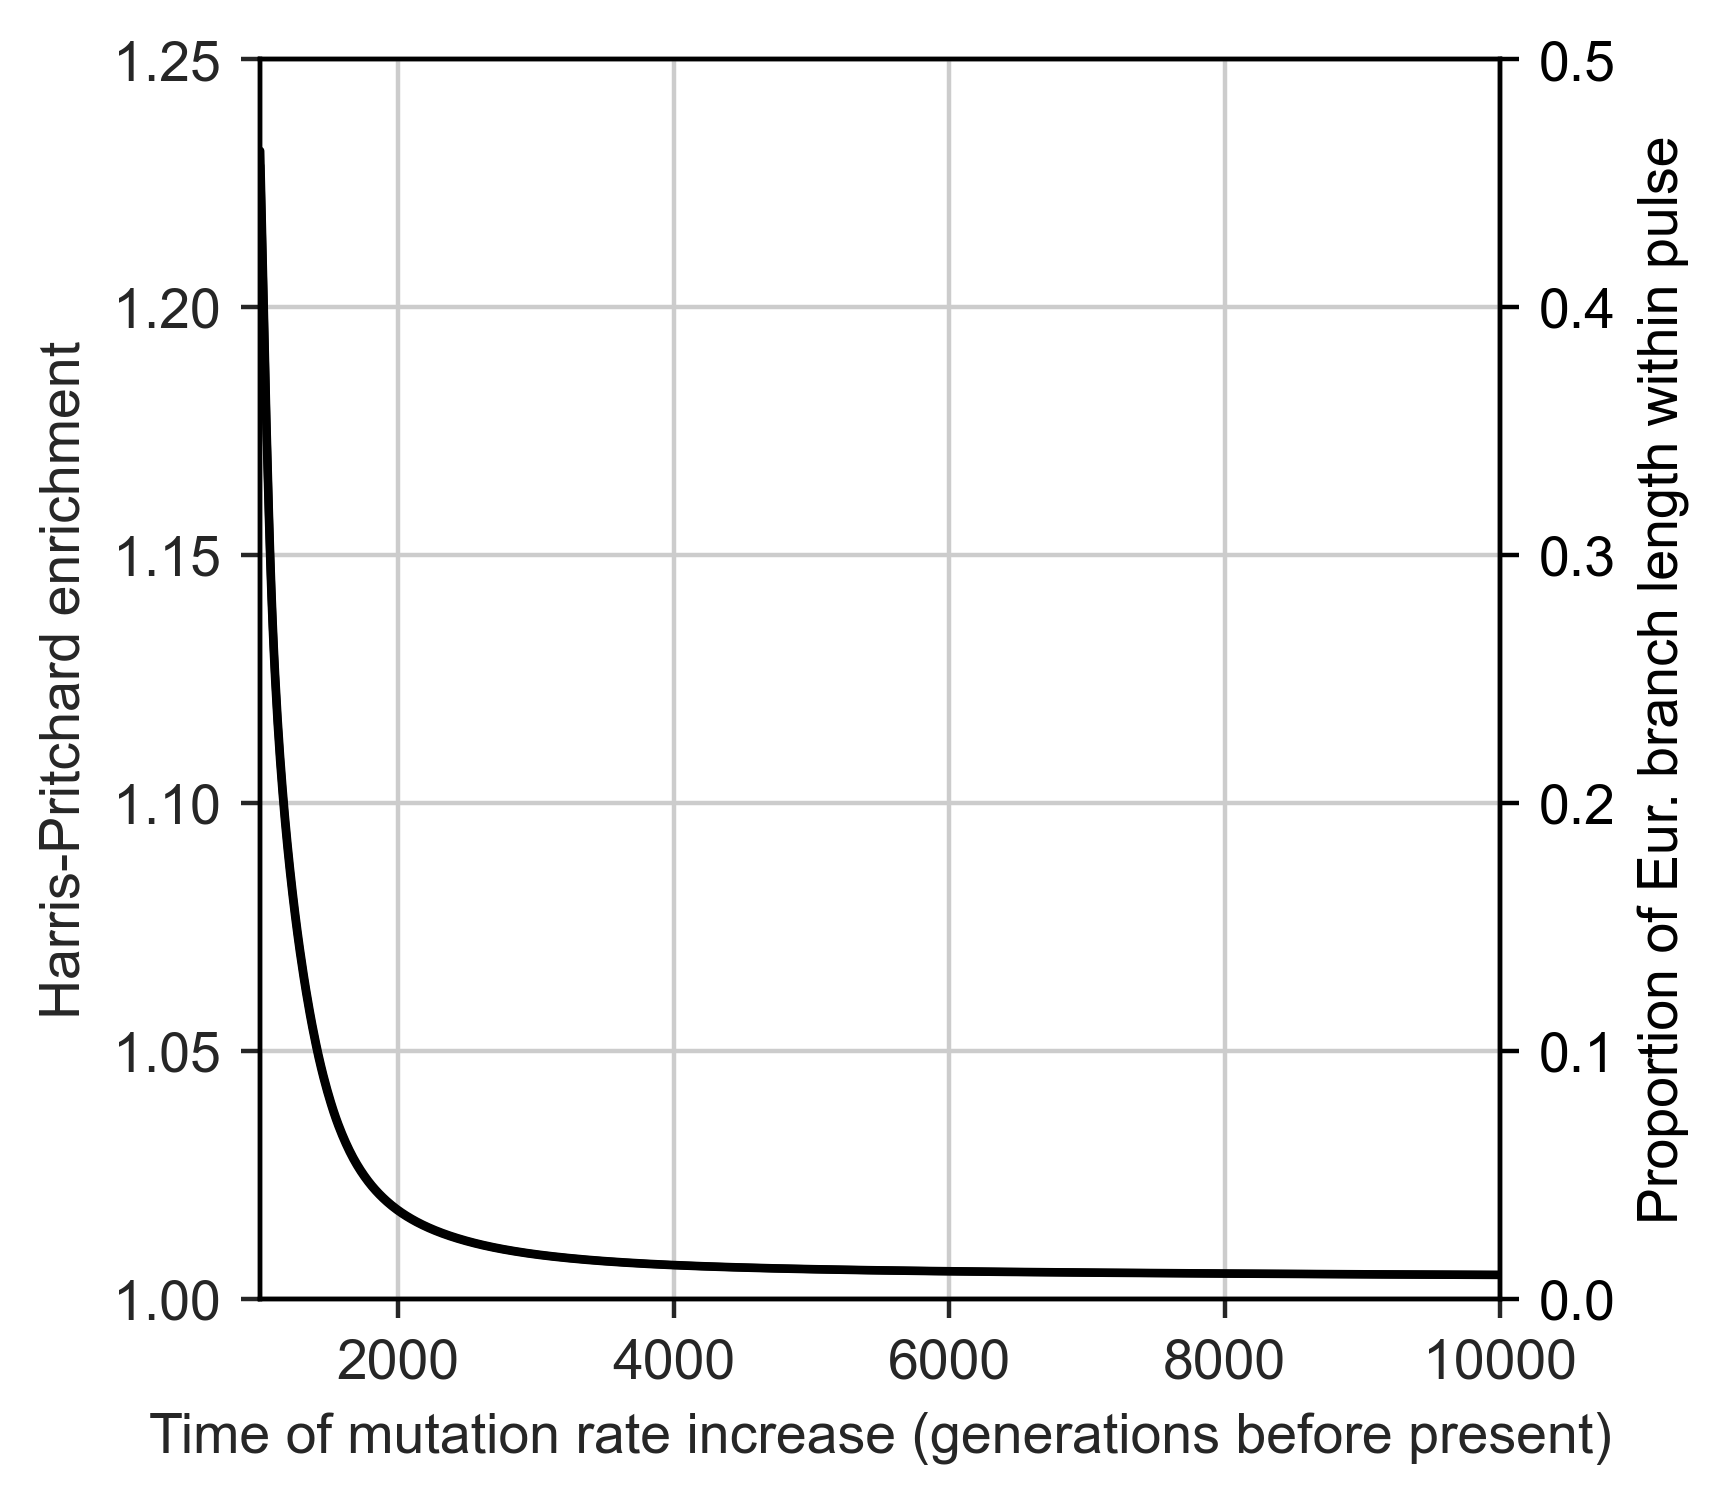

In [29]:
fig = plt.figure(figsize=(4,4.105))

# plot both curves (they should overlap)
ax1 = plt.gca()
ax1.plot(x,y1,color='k')

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(x,y2,color='k')

# make the graph pretty
for ax in [ax1,ax2]:
    plt.sca(ax)
    ax.spines['bottom'].set_color('k')
    ax.spines['top'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    ax.grid([0.9,0.9,0.9])

plt.sca(ax1)
ax1.set_xlabel('Time of mutation rate increase (generations before present)')
ax1.set_ylabel('Harris-Pritchard enrichment')
ax1.set_xlim([999,10000])
plt.tick_params(left=True,bottom=True,which='both')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.ylim([1,1.25])


plt.sca(ax2)
# ax.set_ylabel('Expected proportion of Eur. mutations within pulse',color='k')
ax.set_ylabel('Proportion of Eur. branch length within pulse',color='k')
plt.tick_params(right=True,which='both',color='k')
plt.tick_params(labelright=True,labelcolor='k')
plt.grid(False)
plt.ylim([0,0.5])

ax1 = plt.gca()
bbox = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
print(round(width/height,3),width,height)